In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

#### Ελάχιστες ημερήσιες θερμοκρασίες που παρατηρήθηκαν στη Μελβούρνη από 01-01-1981 μέχρι 31-12-1990

In [44]:
dataset = pd.read_csv('min_temp.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [45]:
dataset

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [46]:
dataset = dataset.rename(columns={'Temp':'Y_t'})

(-5.0, 30.0)

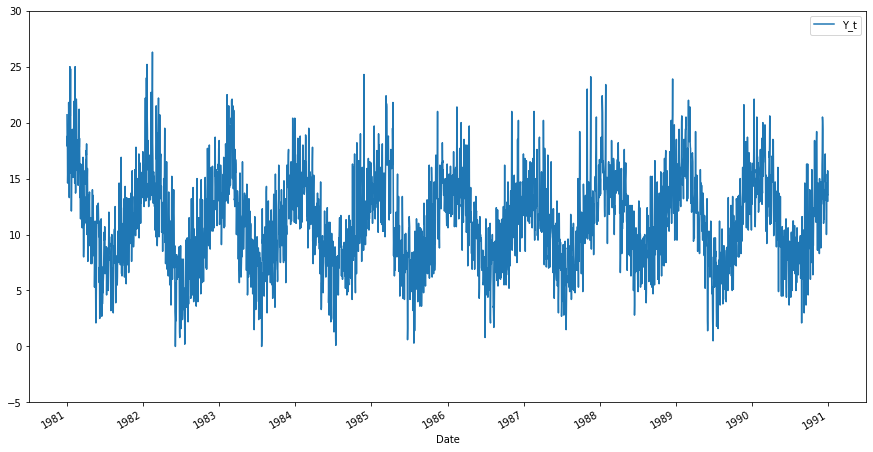

In [47]:
dataset.plot(figsize=(15,8))
plt.ylim((-5,30))

In [48]:
dataset

,Y_t
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [9]:
dataset['Y_t'].shift(2)

Date
1981-01-01     NaN
1981-01-02     NaN
1981-01-03    20.7
1981-01-04    17.9
1981-01-05    18.8
              ... 
1990-12-27    12.9
1990-12-28    14.6
1990-12-29    14.0
1990-12-30    13.6
1990-12-31    13.5
Name: Y_t, Length: 3650, dtype: float64

In [49]:
dataset['Y_(t-1)'] = dataset['Y_t'].shift(1)
dataset['Y_(t-3)'] = dataset['Y_t'].shift(3)

In [50]:
dataset

,Y_t,Y_(t-1),Y_(t-3)
Date,,,
1981-01-01,20.7,NaN,NaN
1981-01-02,17.9,20.7,NaN
1981-01-03,18.8,17.9,NaN
1981-01-04,14.6,18.8,20.7
1981-01-05,15.8,14.6,17.9
...,...,...,...
1990-12-27,14.0,14.6,10.0
1990-12-28,13.6,14.0,12.9
1990-12-29,13.5,13.6,14.6


#### Χωρισμός του dataset σε training και testing set

##### training -> 01-01-1981 μέχρι 21-12-1990
##### testing -> 22-12-1990 μέχρι 31-12-1990

In [51]:
pd.DataFrame(dataset[3:3640])


,Y_t,Y_(t-1),Y_(t-3)
Date,,,
1981-01-04,14.6,18.8,20.7
1981-01-05,15.8,14.6,17.9
1981-01-06,15.8,15.8,18.8
1981-01-07,15.8,15.8,14.6
1981-01-08,17.4,15.8,15.8
...,...,...,...
1990-12-17,13.9,13.6,12.5
1990-12-18,17.2,13.9,13.4
1990-12-19,14.7,17.2,13.6


In [52]:
pd.DataFrame(dataset[3640::])

,Y_t,Y_(t-1),Y_(t-3)
Date,,,
1990-12-22,13.2,13.1,14.7
1990-12-23,13.9,13.2,15.4
1990-12-24,10.0,13.9,13.1
1990-12-25,12.9,10.0,13.2
1990-12-26,14.6,12.9,13.9
1990-12-27,14.0,14.6,10.0
1990-12-28,13.6,14.0,12.9
1990-12-29,13.5,13.6,14.6
1990-12-30,15.7,13.5,14.0


In [53]:
training_set = pd.DataFrame(dataset[3:3640])
testing_set = pd.DataFrame(dataset[3640::])
# training_set = training_set.drop(dataset.index[[0,1]])

In [54]:
training_set

,Y_t,Y_(t-1),Y_(t-3)
Date,,,
1981-01-04,14.6,18.8,20.7
1981-01-05,15.8,14.6,17.9
1981-01-06,15.8,15.8,18.8
1981-01-07,15.8,15.8,14.6
1981-01-08,17.4,15.8,15.8
...,...,...,...
1990-12-17,13.9,13.6,12.5
1990-12-18,17.2,13.9,13.4
1990-12-19,14.7,17.2,13.6


In [55]:
testing_set

,Y_t,Y_(t-1),Y_(t-3)
Date,,,
1990-12-22,13.2,13.1,14.7
1990-12-23,13.9,13.2,15.4
1990-12-24,10.0,13.9,13.1
1990-12-25,12.9,10.0,13.2
1990-12-26,14.6,12.9,13.9
1990-12-27,14.0,14.6,10.0
1990-12-28,13.6,14.0,12.9
1990-12-29,13.5,13.6,14.6
1990-12-30,15.7,13.5,14.0


#### Συντελεστής γραμμικής συσχέτισης για το training set

In [56]:
training_set.corr()

,Y_t,Y_(t-1),Y_(t-3)
Y_t,1.000000,0.774558,0.586168
Y_(t-1),0.774558,1.000000,0.631038
Y_(t-3),0.586168,0.631038,1.000000


<AxesSubplot:xlabel='Y_(t-3)', ylabel='Y_(t-1)'>

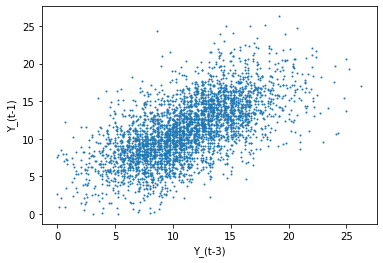

In [58]:
training_set.plot.scatter(x='Y_(t-3)', y='Y_(t-1)',s=1)

#### Αυτοπαλινδρομικό μοντέλο 2ης τάξης AR(2)

$$Y_t = A + B^{(1)} Y_{t−1} + B^{(2)} Y_{t−2} + \epsilon_t$$

In [59]:
model = linear_model.LinearRegression()
X = training_set[['Y_(t-3)','Y_(t-1)']]
y = training_set['Y_t']
model.fit(X,y)

LinearRegression()

In [60]:
model.coef_

array([0.16162223, 0.67212841])

In [61]:
X = testing_set[['Y_(t-3)','Y_(t-1)']]
testing_set['pr1'] = model.predict(X)
print(testing_set)

             Y_t  Y_(t-1)  Y_(t-3)        pr1
Date                                         
1990-12-22  13.2     13.1     14.7  13.035214
1990-12-23  13.9     13.2     15.4  13.215562
1990-12-24  10.0     13.9     13.1  13.314321
1990-12-25  12.9     10.0     13.2  10.709182
1990-12-26  14.6     12.9     13.9  12.771490
1990-12-27  14.0     14.6     10.0  13.283782
1990-12-28  13.6     14.0     12.9  13.349209
1990-12-29  13.5     13.6     14.6  13.355116
1990-12-30  15.7     13.5     14.0  13.190930
1990-12-31  13.0     15.7     13.6  14.604963


(5.0, 25.0)

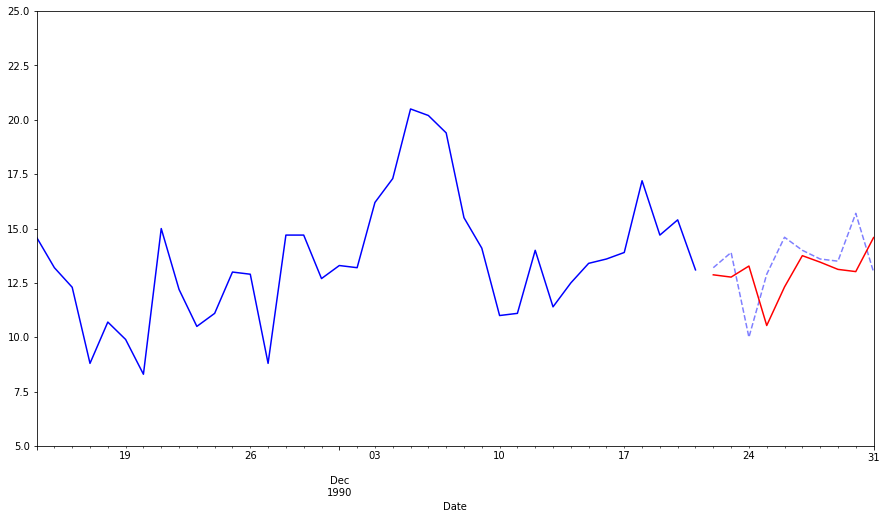

In [43]:
plt.figure(figsize=(15,8))
training_set['Y_t'][3600:].plot(c='blue')
testing_set['Y_t'].plot(c='blue',alpha=0.5, style=['--'])
testing_set['pr1'].plot(c='red')
#testing_set['pr2'].plot(c='magenta')
plt.ylim((5,25))

(5.0, 25.0)

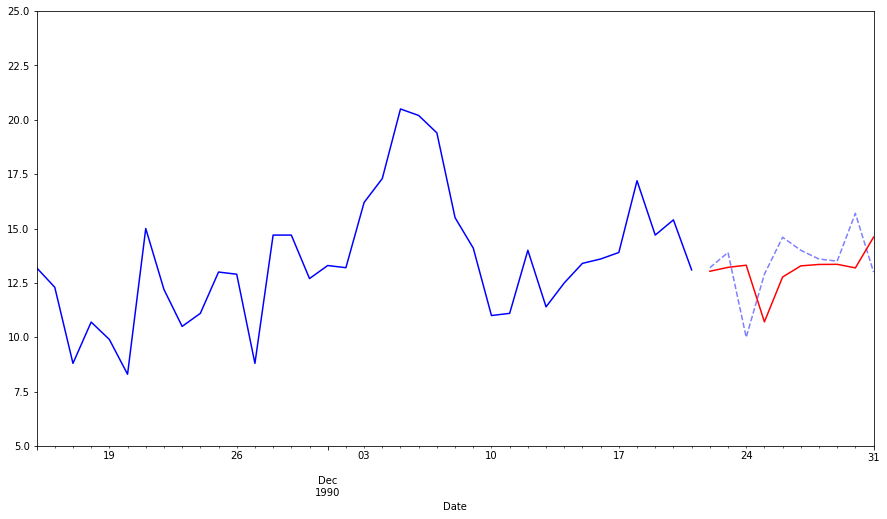

In [62]:
plt.figure(figsize=(15,8))
training_set['Y_t'][3600:].plot(c='blue')
testing_set['Y_t'].plot(c='blue',alpha=0.5, style=['--'])
testing_set['pr1'].plot(c='red')
#testing_set['pr2'].plot(c='magenta')
plt.ylim((5,25))

##### Υπολογισμός του συντελεστή μερικής αυτοσυσχέτισης PACF(2)

$$Y_t = A_1 + B_1 Y_{t−1} + (\epsilon_1 )_t$$
$$\hat y_t = a_1 + b_1 y_{t−1}$$

In [33]:
X = training_set[['Y_(t-1)']] # black box
y = training_set['Y_t']
model.fit(X,y)
model.coef_

array([0.7744778])

In [34]:
training_set['pr_Y_t|Y_(t-1)'] = model.predict(X)
training_set['e_pr_Y_t|Y_(t-1)'] = training_set['Y_t'] - training_set['pr_Y_t|Y_(t-1)']

In [35]:
training_set

,Y_t,Y_(t-1),Y_(t-2),pr_Y_t|Y_(t-1),e_pr_Y_t|Y_(t-1)
Date,,,,,
1981-01-03,18.8,17.9,20.7,16.380553,2.419447
1981-01-04,14.6,18.8,17.9,17.077583,-2.477583
1981-01-05,15.8,14.6,18.8,13.824776,1.975224
1981-01-06,15.8,15.8,14.6,14.754150,1.045850
1981-01-07,15.8,15.8,15.8,14.754150,1.045850
...,...,...,...,...,...
1990-12-17,13.9,13.6,13.4,13.050298,0.849702
1990-12-18,17.2,13.9,13.6,13.282642,3.917358
1990-12-19,14.7,17.2,13.9,15.838418,-1.138418


In [36]:
X = training_set[['Y_(t-1)']]
y = training_set['Y_(t-2)']
model.fit(X,y)

LinearRegression()

In [38]:
model.coef_

array([0.77540578])

$$Y_{t-2} = A_2 + B_2 Y_{t−1} + (\epsilon_2 )_{t-2}$$
$$\hat y_{t-1} = a_2 + b_2 y_{t−1}$$

In [39]:
training_set['pr_Y_(t-2)|Y_(t-1)'] = model.predict(X)
training_set['e_pr_Y_(t-2)|Y_(t-1)'] = training_set['Y_(t-2)'] - training_set['pr_Y_(t-2)|Y_(t-1)']

In [40]:
training_set

,Y_t,Y_(t-1),Y_(t-2),pr_Y_t|Y_(t-1),e_pr_Y_t|Y_(t-1),pr_Y_(t-2)|Y_(t-1),e_pr_Y_(t-2)|Y_(t-1)
Date,,,,,,,
1981-01-03,18.8,17.9,20.7,16.380553,2.419447,16.389576,4.310424
1981-01-04,14.6,18.8,17.9,17.077583,-2.477583,17.087441,0.812559
1981-01-05,15.8,14.6,18.8,13.824776,1.975224,13.830737,4.969263
1981-01-06,15.8,15.8,14.6,14.754150,1.045850,14.761224,-0.161224
1981-01-07,15.8,15.8,15.8,14.754150,1.045850,14.761224,1.038776
...,...,...,...,...,...,...,...
1990-12-17,13.9,13.6,13.4,13.050298,0.849702,13.055331,0.344669
1990-12-18,17.2,13.9,13.6,13.282642,3.917358,13.287953,0.312047
1990-12-19,14.7,17.2,13.9,15.838418,-1.138418,15.846792,-1.946792


In [41]:
training_set[['e_pr_Y_t|Y_(t-1)', 'e_pr_Y_(t-2)|Y_(t-1)']].corr()

,e_pr_Y_t|Y_(t-1),e_pr_Y_(t-2)|Y_(t-1)
e_pr_Y_t|Y_(t-1),1.000000,0.076791
e_pr_Y_(t-2)|Y_(t-1),0.076791,1.000000


In [42]:
from statsmodels.tsa.stattools import pacf
print(pacf(dataset['Y_t'][:3640], nlags=10))

[1.         0.77454064 0.07667323 0.18903945 0.15209657 0.12980496
 0.11015613 0.10214422 0.07452041 0.07049043 0.03490694]
